In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('myexcel.csv')
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [2]:
data['Height'] = np.random.randint(150, 181, size=len(data))
data[['Name', 'Height']].head()

,Name,Height
0,Avery Bradley,177
1,Jae Crowder,165
2,John Holland,156
3,R.J. Hunter,172
4,Jonas Jerebko,179


In [3]:
team_distribution = data['Team'].value_counts()
team_percentage = (team_distribution / len(data)) * 100
team_analysis = pd.DataFrame({
    'Employee Count': team_distribution,
    'Percentage (%)': team_percentage
})
team_analysis.reset_index().rename(columns={'index':'Team'})

,Team,Employee Count,Percentage (%)
0,New Orleans Pelicans,19,4.148472
1,Memphis Grizzlies,18,3.930131
2,Utah Jazz,16,3.493450
3,New York Knicks,16,3.493450
4,Milwaukee Bucks,16,3.493450
5,Brooklyn Nets,15,3.275109
6,Portland Trail Blazers,15,3.275109
7,Oklahoma City Thunder,15,3.275109
8,Denver Nuggets,15,3.275109
9,Washington Wizards,15,3.275109


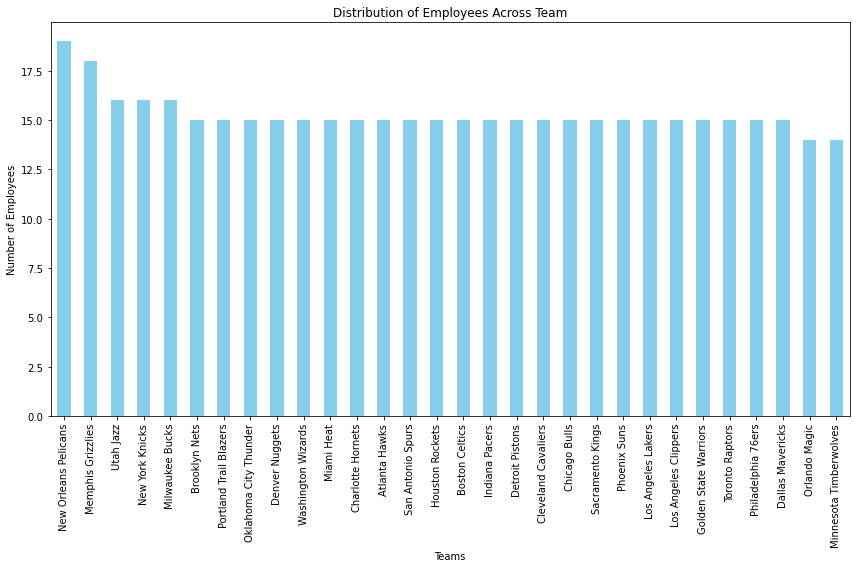

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
team_analysis['Employee Count'].plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees Across Team')
plt.xlabel('Teams')
plt.ylabel('Number of Employees')
plt.xticks(ticks=range(len(team_analysis)), labels=team_analysis.index, rotation=90)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
position_distribution = data['Position'].value_counts()
position_analysis = pd.DataFrame({
    'Employee Count': position_distribution
})
print(position_analysis)

    Employee Count
SG             102
PF             100
PG              92
SF              85
C               79


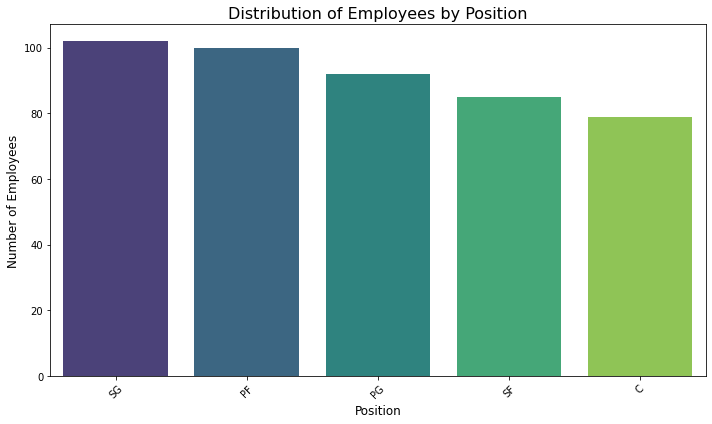

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=position_analysis.index, y='Employee Count', data=position_analysis, palette='viridis')
plt.title('Distribution of Employees by Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
bins = [20, 25, 30, 35, 40, 45, 50]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
age_group_distribution = data['Age Group'].value_counts().sort_index()
predominant_age_group = age_group_distribution.idxmax()
predominant_count = age_group_distribution.max()
print(f"The predominant age group is {predominant_age_group} with {predominant_count} employees.")


The predominant age group is 26-30 with 182 employees.


In [8]:
import pandas as pd
data['Salary'] = data['Salary'].fillna(0)
team_salary = data.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = data.groupby('Position')['Salary'].sum().sort_values(ascending=False)
top_team = team_salary.idxmax()
top_team_salary = team_salary.max()
top_position = position_salary.idxmax()
top_position_salary = position_salary.max()
print(f"The team with the highest salary expenditure is {top_team} with a total of ${top_team_salary}.")
print(f"The position with the highest salary expenditure is {top_position} with a total of ${top_position_salary}.")


The team with the highest salary expenditure is Cleveland Cavaliers with a total of $106988689.0.
The position with the highest salary expenditure is C with a total of $466377332.0.


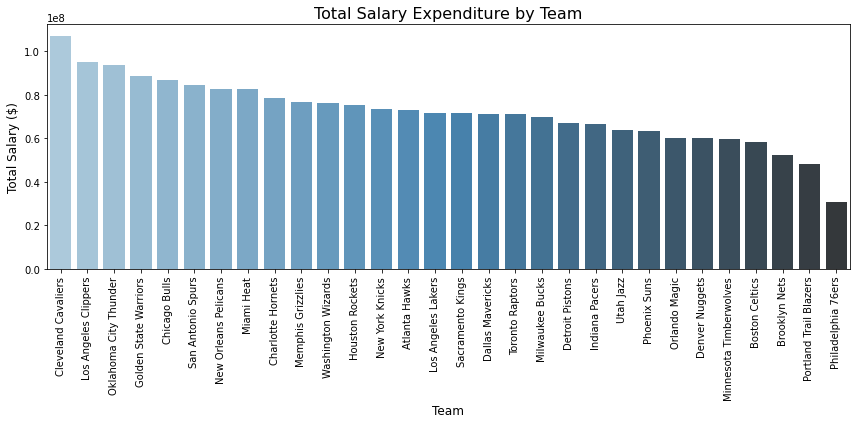

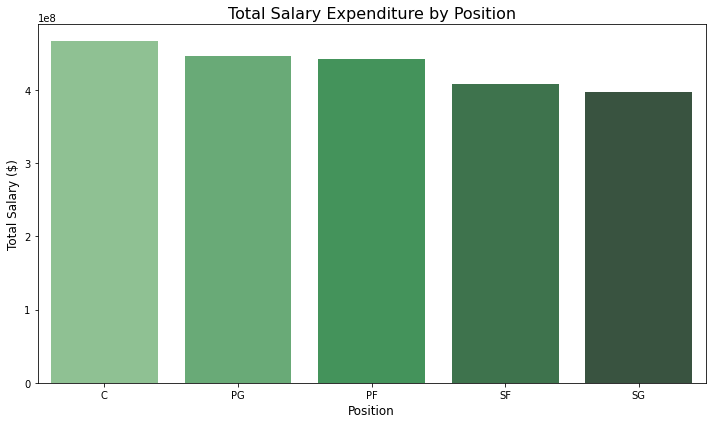

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x=team_salary.index, y=team_salary.values, palette='Blues_d')
plt.title('Total Salary Expenditure by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Salary ($)', fontsize=12)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=position_salary.index, y=position_salary.values, palette='Greens_d')
plt.title('Total Salary Expenditure by Position', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Total Salary ($)', fontsize=12)
plt.tight_layout()
plt.show()


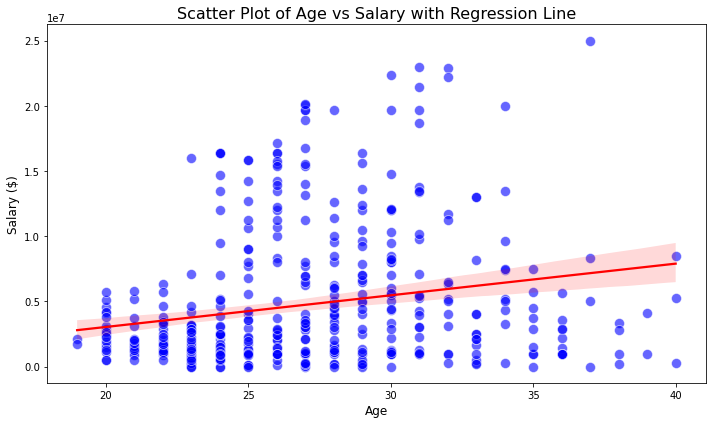

Correlation between Age and Salary: 0.21


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
data['Salary'] = data['Salary'].fillna(0)
data['Age'] = data['Age'].fillna(0)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data, color='b', s=100, alpha=0.6)
sns.regplot(x='Age', y='Salary', data=data, scatter=False, color='r')
plt.title('Scatter Plot of Age vs Salary with Regression Line', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.tight_layout()
plt.show()
correlation = data['Age'].corr(data['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")
